In [8]:
from __future__ import division
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import pylab
from os import path
from datetime import datetime

In [9]:
# Initialization #
file_path = path.relpath("data/log_2019-08-05.csv")
file = open(file_path, "r")
y = []
x = []
dict = {}
i = 0
index = 0

In [10]:
# Parse the data out of the file #
lines = file.readlines()
for line in lines[:-1]:
    if i > 1: # Disregard header info
        lineParts = line.strip().split(",") # Split the line into each columns values
        dict[i] = [lineParts[1],lineParts[3],lineParts[4],lineParts[5],lineParts[6],lineParts[7]] # Create a dictionary entry w/ the sensor values
        #       = [Milis, Side, W, X, Y, Z]
    i += 1

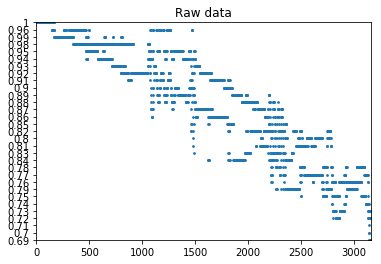

In [32]:
# Initial data
x = list(dict.keys())
y = []
for key,value in dict.items(): # Create an array with the dictionary values
    y.append(value[2]) # W value

plt.scatter(x,y,s=3)
plt.axis([min(x), max(x), min(y), max(y)])
        
plt.title("Raw data")
plt.show()

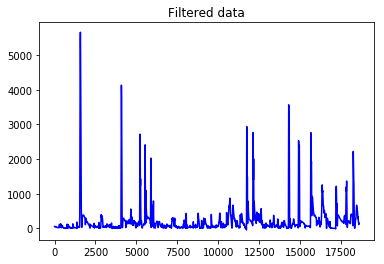

In [8]:
# Filter the data #
# TODO: find the "minimum duration" (i.e. # of data points) of a tic and parse out all the peaks which don't have (# neighbours) > (min duration)
y = np.asarray(y)
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A, y)
plt.plot(smooth_data,'b-')
plt.title("Filtered data")
plt.show()

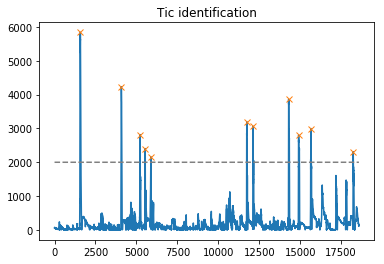

In [9]:
# Find the tics #
thresh = 2000
peaks, _ = find_peaks(y, height=thresh, distance=100, width=10, prominence=1000)
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.plot(np.full((len(y),1), thresh), "--", color="gray")
plt.title("Tic identification")
plt.show()

In [20]:
# Final analysis #
READINGS_PER_MINUTE = 11993
print("========= FINAL OUTPUT =========")
print("Total duration: " + str(duration))
num_tics = len(peaks)
print("Total number of tics: " + str(num_tics))
avg_per_min = int((float(num_tics) / float(data_len)) * READINGS_PER_MINUTE)
avg_per_hour = int((float(num_tics) / float(data_len)) * READINGS_PER_MINUTE * 60)
print("Average number of tics per minute: " + str(avg_per_min))
print("Average number of tics per hour: " + str(avg_per_hour))

========= FINAL OUTPUT =========
Total duration: 0:01:32.954000
Total number of tics: 11
Average number of tics per minute: 7
Average number of tics per hour: 425
